In [10]:
import pandas as pd
from pathlib import Path
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
train_file = Path('../data/santander_satisfaction/train.csv') 
test_file = Path('../data/santander_satisfaction/test.csv')

In [3]:
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [4]:
df_train = df_train.set_index('ID')
df_test = df_test.set_index('ID')

In [5]:
X = df_train.drop('TARGET', axis=1)
y = df_train.TARGET

In [6]:
X_train, X_Val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y)

In [7]:
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train, y_train)

In [8]:
y_smote.value_counts()

0    62060
1    62060
Name: TARGET, dtype: int64

In [9]:
y_adasyn.value_counts()

1    62359
0    62060
Name: TARGET, dtype: int64

In [35]:
# modelando
pipe_prep = Pipeline([
    ('normalization', StandardScaler())
])

model_smote = Pipeline([
    ('prep', pipe_prep),
    ('select_features', GenericUnivariateSelect(f_classif, mode='k_best', param=20)),
    ('model', SVC())
])

In [36]:
model_adasyn = Pipeline([
    ('prep', pipe_prep),
    ('select_features', GenericUnivariateSelect(f_classif, mode='k_best', param=20)),
    ('model', SVC())
])

In [37]:
model_smote.fit(X_smote, y_smote)

C:\Users\luiz_\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\luiz_\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('prep', Pipeline(steps=[('normalization', StandardScaler())])),
                ('select_features',
                 GenericUnivariateSelect(mode='k_best', param=20)),
                ('model', SVC())])

In [38]:
model_adasyn.fit(X_adasyn, y_adasyn)

C:\Users\luiz_\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\luiz_\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('prep', Pipeline(steps=[('normalization', StandardScaler())])),
                ('select_features',
                 GenericUnivariateSelect(mode='k_best', param=20)),
                ('model', SVC())])

In [41]:
y_pred_smote = model_smote.predict(X_Val)
y_pred_adasyn = model_adasyn.predict(X_Val)

print(classification_report(y_val, y_pred_smote))
print(classification_report(y_val, y_pred_adasyn))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10952
           1       0.16      0.50      0.24       451

    accuracy                           0.87     11403
   macro avg       0.57      0.69      0.58     11403
weighted avg       0.94      0.87      0.90     11403

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10952
           1       0.16      0.51      0.24       451

    accuracy                           0.87     11403
   macro avg       0.57      0.70      0.59     11403
weighted avg       0.95      0.87      0.90     11403



In [28]:


def feature_graph(dataset, target, i, j):
    pca = PCA(n_components=5)
    dataset_pca = pca.fit_transform(dataset)
    fig, ax = plt.subplots()
    ax.scatter(dataset_pca[:,i], dataset_pca[:,j], c=target)
    return plt.show()

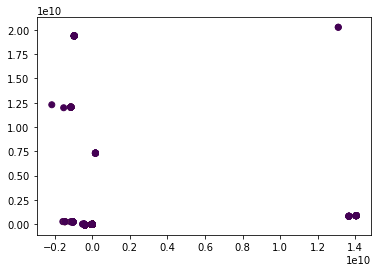

In [34]:
feature_graph(X_train, y_train, i=2, j=1)

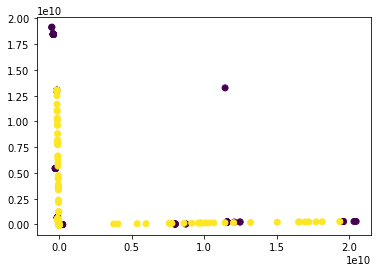

In [35]:
feature_graph(X_adasyn, y_adasyn, i=2, j=1)

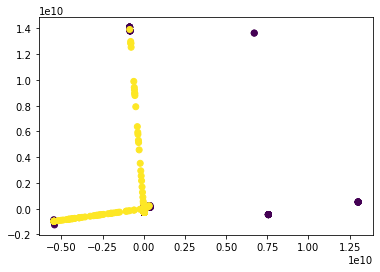

In [32]:
feature_graph(X_smote, y_smote,i=4, j=3)

In [27]:
dataset_pca[:,1]

array([-15654060.85203216, -15654060.83047904, -15654060.82697275, ...,
       -15654060.83064518, -15654060.81598317, -15654060.78708418])